In [4]:
import json
import numpy
import pandas as pd

In [5]:
# with open('Sarcasm_Headlines_Dataset.json' , 'r') as f:
#   datasabe = json.load(f)

In [6]:
beauty_df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

In [7]:
beauty_df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [8]:
sentences = []
labels = []
urls = []


  

In [9]:
beauty_df['headline'].apply(lambda x: sentences.append(x))
beauty_df['is_sarcastic'].apply(lambda x: labels.append(x))
beauty_df['article_link'].apply(lambda x: urls.append(x))

0        None
1        None
2        None
3        None
4        None
         ... 
26704    None
26705    None
26706    None
26707    None
26708    None
Name: article_link, Length: 26709, dtype: object

In [ ]:
urls

In [11]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer( oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)




[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [12]:
print(sequences[0])

[308, 15115, 679, 3337, 2298, 48, 382, 2576, 15116, 6, 2577, 8434]


In [13]:
for k, v in word_index.items():
    if v == 308:
      print(k)

former


In [14]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [15]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [16]:
tokenizer = Tokenizer(num_words= vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [17]:
training_squences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_squences,maxlen=max_length,padding=padding_type,truncating=trunc_type  )

In [18]:
testing_squences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_squences,maxlen=max_length,padding=padding_type,truncating=trunc_type  )

In [23]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_7 (Dense)             (None, 24)                408       
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [47]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6595 - accuracy: 0.5926 - val_loss: 0.5571 - val_accuracy: 0.7418 - 3s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4143 - accuracy: 0.8381 - val_loss: 0.3780 - val_accuracy: 0.8420 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3023 - accuracy: 0.8795 - val_loss: 0.3504 - val_accuracy: 0.8550 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2512 - accuracy: 0.9032 - val_loss: 0.3501 - val_accuracy: 0.8520 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2154 - accuracy: 0.9176 - val_loss: 0.3481 - val_accuracy: 0.8530 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1893 - accuracy: 0.9290 - val_loss: 0.3576 - val_accuracy: 0.8577 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1698 - accuracy: 0.9365 - val_loss: 0.3713 - val_accuracy: 0.8511 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1510 - accuracy: 0.9457 - val_loss: 0.3829 - val_accuracy: 0.8550 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

In [48]:
sentence = ["you are a very bad person", "I like this girl and she is very beautiful"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 42ms/step
[[9.931726e-04]
 [2.466659e-11]]


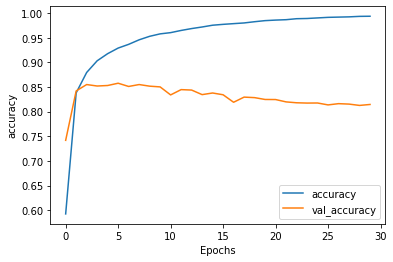

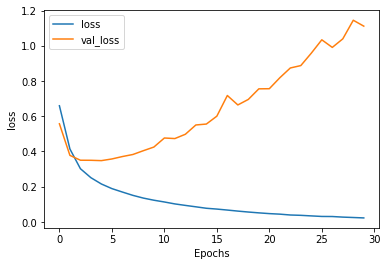

In [49]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")